## Problem Statement
- This data set is a Beer data-set for your Data Science case-study round. You are expected to build a Machine Learning model which predicts the overall rating of the beer. (“review/overall” column in “train.csv” is your dependent variable.)

## Machine Learning Problem Formulation:
__- Formulating this prediction problem as a regression problem.__

## Metric Used : 

- Root Mean Square Error(RMSE) : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
- R^2 or Coefficient of Determination : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

## Data and Datatypes:
- index                  int64
- beer/ABV             float64
- beer/beerId            int64
- beer/brewerId          int64
- beer/name             object
- beer/style            object
- review/appearance    float64
- review/aroma         float64
- review/overall       float64
- review/palate        float64
- review/taste         float64
- review/text           object
- review/timeStruct     object
- review/timeUnix        int64
- user/ageInSeconds    float64
- user/birthdayRaw      object
- user/birthdayUnix    float64
- user/gender           object
- user/profileName      object

## Approach: 
1. Data Acquisition
2. Data Loading
3. Exploratory Data Analysis and Handling nulls 
4. Data Preprocessing
5. Data Vectorisation
6. Modelling
7. Conclusion

## Let's Begin !!

In [2]:
cd drive/My\ Drive/Algoscale

/content/drive/My Drive/Algoscale


## Load Libraries

In [378]:
import nltk
nltk.download('stopwords')

import pandas as pd
import seaborn as sns
import numpy as np
import xgboost as xgb
from tqdm import tqdm
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load Dataset

In [379]:
train = pd.read_csv('train.csv')

## Exploratory Data Analysis

In [380]:
train.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [381]:
train.shape

(37500, 19)

In [382]:
train.columns

Index(['index', 'beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name',
       'beer/style', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'review/text', 'review/timeStruct',
       'review/timeUnix', 'user/ageInSeconds', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/gender', 'user/profileName'],
      dtype='object')

In [383]:
features = train[['index', 'beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name',
       'beer/style', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'review/text', 'review/timeStruct',
       'review/timeUnix', 'user/ageInSeconds', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/gender', 'user/profileName']]

In [384]:
label = train[['review/overall']]

In [385]:
features.shape

(37500, 19)

In [386]:
label.shape

(37500, 1)

4.0    13868
4.5     8666
3.5     6551
3.0     3319
5.0     2671
2.5     1193
2.0      807
1.5      248
1.0      176
0.0        1
Name: review/overall, dtype: int64


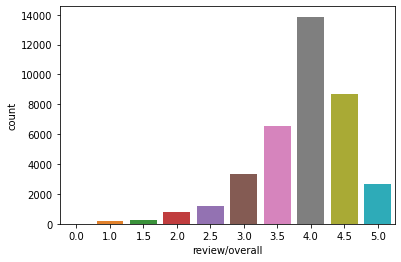

In [387]:
#Imbalanced Data
ax = sns.countplot(x=label['review/overall'], data=label)
print(label['review/overall'].value_counts())

- Imbalanced Dataset
- Maximum rating : 4
- Minimum rating : 0

In [388]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

#### Columns having null values : 
- review/text
- user/ageInSeconds,
- user/birthdayRaw,
- user/birthdayUnix,
- user/gender,
- user/profileName     

In [389]:
features.isnull().sum()

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64

## Handling nulls

In [390]:
from datetime import timezone
# Imputing with mean values of birthdays in unix timestamp
features['user/birthdayRaw'] = pd.to_datetime(features['user/birthdayRaw'],errors='coerce')
df = features[features['user/birthdayRaw'].notnull()]

birthDays = []
for i in df['user/birthdayRaw']:
  birthDays.append(time.mktime(i.timetuple()))
  
def Average(lst): 
    return sum(lst) / len(lst) 
mean =  Average(birthDays)

In [391]:
# Replace empty/null values with median since i am taking age groups to be near  and robust from outliers
features['user/ageInSeconds'].fillna(features['user/ageInSeconds'].median(), inplace=True) 
features['user/birthdayRaw'].fillna(mean, inplace=True) 
features['user/birthdayUnix'].fillna(features['user/birthdayUnix'].median(), inplace=True) 
features['user/gender'].fillna('missing', inplace=True) 


In [392]:
features = features.dropna()

In [393]:
features.isnull().sum()

index                0
beer/ABV             0
beer/beerId          0
beer/brewerId        0
beer/name            0
beer/style           0
review/appearance    0
review/aroma         0
review/overall       0
review/palate        0
review/taste         0
review/text          0
review/timeStruct    0
review/timeUnix      0
user/ageInSeconds    0
user/birthdayRaw     0
user/birthdayUnix    0
user/gender          0
user/profileName     0
dtype: int64

In [394]:
features.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,1.100009e+09,2.41603e+08,318326400.0,missing,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,1.100009e+09,2.41603e+08,318326400.0,missing,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,1.100009e+09,2.41603e+08,318326400.0,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,1976-08-10 00:00:00,208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,1.100009e+09,2.41603e+08,318326400.0,missing,Brewbro000


In [395]:
features=features.reset_index()

# Data Preprocessing:
Q) How can you use "beer/name", "beer/style" and "review/text" as features to predict the overall rating of the beer ?

In [396]:
### Dataset Preprocessing 
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()

def preprocessor(dataset,col):
  corpus = []
  for i in range(0, len(dataset)):
      review = re.sub('[^a-zA-Z]', ' ', dataset[col][i])
      review = review.lower()
      review = review.split()
      review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
      review = ' '.join(review)
      corpus.append(review)
  return corpus

In [397]:
beerNames = preprocessor(features,'beer/name') ## Preprocessing Beer Names
features['clean_beerNames'] = beerNames
features.drop('beer/name',axis=1,inplace=True)

In [398]:
beerTypes = preprocessor(features,'beer/style') ## Preprocessing Beer types
features['clean_beerTypes'] = beerTypes
features.drop('beer/style',axis=1,inplace=True)

In [399]:
#View the top types of beer in our dataset whose frequency is greater than 500

beernames = features['clean_beerNames'].value_counts()
print('Number of beer names are : {0}'.format(len(beernames)))
print(beernames[beernames > 500])

Number of beer names are : 1671
founder breakfast stout                1882
founder kb kentucki breakfast stout    1438
founder centenni ipa                   1063
founder red rye pa                     1051
founder dirti bastard                   983
pilsner urquel                          948
founder doubl troubl                    857
founder imperi stout                    805
founder devil dancer                    799
founder backwood bastard                778
founder porter                          675
founder nemesi                          670
aecht schlenkerla rauchbier rzen        665
b r crusher oatmeal imperi stout        635
founder curmudgeon old ale              574
stoudt doubl ipa india pale ale         538
Name: clean_beerNames, dtype: int64


In [400]:
beerNameList = []
for i in range(16):
  beerNameList.append(beernames.index[i])
print(beerNameList)

['founder breakfast stout', 'founder kb kentucki breakfast stout', 'founder centenni ipa', 'founder red rye pa', 'founder dirti bastard', 'pilsner urquel', 'founder doubl troubl', 'founder imperi stout', 'founder devil dancer', 'founder backwood bastard', 'founder porter', 'founder nemesi', 'aecht schlenkerla rauchbier rzen', 'b r crusher oatmeal imperi stout', 'founder curmudgeon old ale', 'stoudt doubl ipa india pale ale']


In [401]:
beertype = features['clean_beerTypes'].value_counts()
print('Number of beer types are : {0}'.format(len(beertype)))
print(beertype[beertype > 500])

Number of beer types are : 95
american doubl imperi stout        4490
american ipa                       3048
american doubl imperi ipa          2871
scotch ale wee heavi               2133
russian imperi stout               2030
american pale ale apa              1711
american porter                    1687
rauchbier                          1462
rye beer                           1355
czech pilsen                       1130
fruit veget beer                   1021
english pale ale                    971
old ale                             783
doppelbock                          669
american barleywin                  634
euro pale lager                     522
extra special strong bitter esb     505
Name: clean_beerTypes, dtype: int64


In [402]:
beerTypeList = []
for i in range(17):
  beerTypeList.append(beertype.index[i])
print(beerTypeList)

['american doubl imperi stout', 'american ipa', 'american doubl imperi ipa', 'scotch ale wee heavi', 'russian imperi stout', 'american pale ale apa', 'american porter', 'rauchbier', 'rye beer', 'czech pilsen', 'fruit veget beer', 'english pale ale', 'old ale', 'doppelbock', 'american barleywin', 'euro pale lager', 'extra special strong bitter esb']


In [403]:
#Recode the beer names keeping only top beer names (all others at NA)
from pandas.api.types import CategoricalDtype
features.clean_beerNames= features.clean_beerNames.astype(CategoricalDtype(categories=beerNameList))

In [404]:
#Recode the beer types keeping only top beer types (all others at NA)
features.clean_beerTypes= features.clean_beerTypes.astype(CategoricalDtype(categories=beerTypeList))

In [405]:
features.info() ## Introduced NA into clean_beerNames and clean_beerTypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37485 entries, 0 to 37484
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   level_0            37485 non-null  int64   
 1   index              37485 non-null  int64   
 2   beer/ABV           37485 non-null  float64 
 3   beer/beerId        37485 non-null  int64   
 4   beer/brewerId      37485 non-null  int64   
 5   review/appearance  37485 non-null  float64 
 6   review/aroma       37485 non-null  float64 
 7   review/overall     37485 non-null  float64 
 8   review/palate      37485 non-null  float64 
 9   review/taste       37485 non-null  float64 
 10  review/text        37485 non-null  object  
 11  review/timeStruct  37485 non-null  object  
 12  review/timeUnix    37485 non-null  int64   
 13  user/ageInSeconds  37485 non-null  float64 
 14  user/birthdayRaw   37485 non-null  object  
 15  user/birthdayUnix  37485 non-null  float64 
 16  user

In [322]:
beertext = preprocessor(features,'review/text') ## Preprocessing Beer text
features['clean_beerText'] = beertext
features.drop('review/text',axis=1,inplace=True)

In [406]:
features.isnull().sum()

level_0                  0
index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text              0
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds        0
user/birthdayRaw         0
user/birthdayUnix        0
user/gender              0
user/profileName         0
clean_beerNames      23124
clean_beerTypes      10463
dtype: int64

In [408]:
features['beer/beerId'].value_counts()

11757    1882
19960    1438
5441     1063
16074    1051
7463      983
         ... 
63735       1
26853       1
42273       1
41116       1
67406       1
Name: beer/beerId, Length: 1731, dtype: int64

In [409]:
beerId = features['beer/beerId'].value_counts()
print('Number of beer ids are : {0}'.format(len(beerId)))
print(beerId[beerId > 500])

Number of beer ids are : 1731
11757    1882
19960    1438
5441     1063
16074    1051
7463      983
429       946
34146     857
21822     805
17538     799
35036     778
7348      675
727       665
33644     635
24905     574
20470     538
Name: beer/beerId, dtype: int64


In [410]:
beerIdList = []
for i in range(15):
  beerIdList.append(beerId.index[i])
print(beerIdList)

[11757, 19960, 5441, 16074, 7463, 429, 34146, 21822, 17538, 35036, 7348, 727, 33644, 24905, 20470]


In [411]:
#Recode the beer names keeping only top beer names (all others at NA)
from pandas.api.types import CategoricalDtype
features['beer/beerId']= features['beer/beerId'].astype(CategoricalDtype(categories=beerIdList))

In [412]:
features['beer/brewerId'].value_counts()

1199     14968
394       2936
14879     2349
263       1809
3268      1277
         ...  
27133        1
15607        1
3207         1
3408         1
17783        1
Name: beer/brewerId, Length: 212, dtype: int64

In [413]:
brewerId = features['beer/brewerId'].value_counts()
print('Number of brewer ids are : {0}'.format(len(brewerId)))
print(brewerId[brewerId > 500])

Number of brewer ids are : 212
1199     14968
394       2936
14879     2349
263       1809
3268      1277
395       1225
365       1069
1         1016
1417       908
14         834
568        785
1075       666
1315       601
Name: beer/brewerId, dtype: int64


In [414]:
brewerIdList = []
for i in range(15):
  brewerIdList.append(brewerId.index[i])
print(brewerIdList)

[1199, 394, 14879, 263, 3268, 395, 365, 1, 1417, 14, 568, 1075, 1315, 9020, 60]


In [415]:
#Recode the beer names keeping only top beer names (all others at NA)
from pandas.api.types import CategoricalDtype
features['beer/brewerId']= features['beer/brewerId'].astype(CategoricalDtype(categories=brewerIdList))

In [416]:
features.columns

Index(['level_0', 'index', 'beer/ABV', 'beer/beerId', 'beer/brewerId',
       'review/appearance', 'review/aroma', 'review/overall', 'review/palate',
       'review/taste', 'review/text', 'review/timeStruct', 'review/timeUnix',
       'user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix',
       'user/gender', 'user/profileName', 'clean_beerNames',
       'clean_beerTypes'],
      dtype='object')

In [417]:
features.drop(['level_0', 'index','review/timeStruct','user/profileName','user/birthdayRaw'],axis=1,inplace=True)

## Checking Correlations

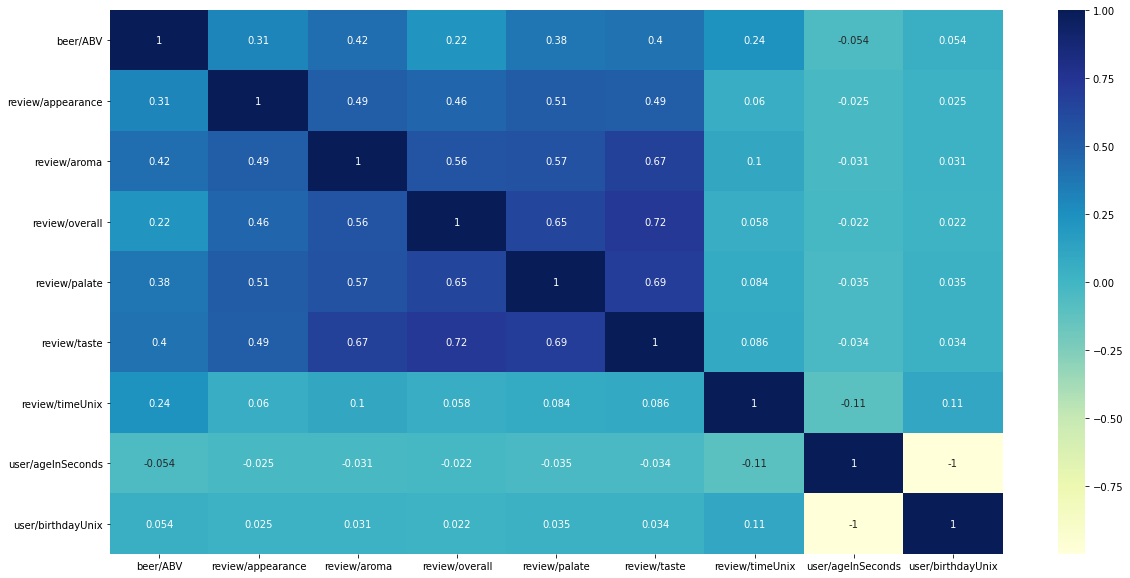

In [418]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(features.corr(method='spearman'), annot=True, cmap="YlGnBu")

In [419]:
features['beer/brewerId'] = features['beer/brewerId'].cat.add_categories('0')
features['beer/brewerId'].fillna('0', inplace=True) 


In [420]:
features['beer/beerId'] = features['beer/beerId'].cat.add_categories('0')
features['beer/beerId'].fillna('0', inplace=True) 


In [421]:
features = features.sample(frac=1).reset_index(drop=True)

In [422]:
features

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeUnix,user/ageInSeconds,user/birthdayUnix,user/gender,clean_beerNames,clean_beerTypes
0,5.20,0,263,3.5,4.0,3.5,3.5,4.0,"Pours a slightly hazy, brownish-orange with a ...",1167426832,1.013958e+09,404377200.0,Male,NaN,rauchbier
1,3.80,0,0,3.5,3.5,4.0,4.0,4.0,Had a bottle purchased from my Local Netto sto...,1302905047,1.100009e+09,318326400.0,missing,NaN,NaN
2,10.50,21822,1199,5.0,5.0,4.5,5.0,5.0,acquired through trade with rysberg01 (good tr...,1161240979,1.100009e+09,318326400.0,missing,founder imperi stout,russian imperi stout
3,8.30,11757,1199,5.0,4.0,4.5,4.5,4.5,Kudos to Derek for getting this gem on draft i...,1171893949,1.100009e+09,318326400.0,missing,founder breakfast stout,american doubl imperi stout
4,8.30,11757,1199,4.5,4.0,4.0,2.5,4.0,Bottle tasted side by side with KBS.\t\tPours ...,1272463585,1.034431e+09,383904000.0,Male,founder breakfast stout,american doubl imperi stout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37480,5.79,0,395,4.5,4.5,4.5,4.0,4.0,I really enjoyed BBC's Dark Star Porter so I'm...,1087000030,1.100009e+09,318326400.0,missing,NaN,american pale ale apa
37481,10.50,21822,1199,4.5,4.0,5.0,4.5,4.5,A- Pours very dark brown and settles pitch bla...,1299310750,1.100009e+09,318326400.0,missing,founder imperi stout,russian imperi stout
37482,9.00,0,394,4.5,4.5,5.0,3.5,4.5,750ml bottle from hopdog via trade. Thanks for...,1183336018,1.378563e+09,39772800.0,Male,NaN,NaN
37483,10.00,20470,394,4.0,3.0,4.0,4.0,4.5,Pouring into a snifter from a room temperature...,1122259499,1.100009e+09,318326400.0,missing,stoudt doubl ipa india pale ale,american doubl imperi ipa


In [375]:
# features['review/overall'] = train['review/overall']

## Train-Test Split(70:30)

In [428]:
#spit data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, features['review/overall'], test_size=0.3, random_state=64)

In [429]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26239, 15), (11246, 15), (26239,), (11246,))

In [362]:
# features.drop(['product_category_2'],axis=1,inplace=True)

## Vectorise Numerical Features

In [430]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

def numerical_vectorizations(m,o):
    
    scalars = StandardScaler()
    scalars.fit(m.values.reshape(-1,1)) 
    print(f"Mean : {scalars.mean_[0]}, Standard deviation : {np.sqrt(scalars.var_[0])}")

    standardized_train = scalars.transform(m.values.reshape(-1, 1))
    standardized_test = scalars.transform(o.values.reshape(-1, 1))
    return standardized_train,standardized_test

In [439]:
X_train.head(5)

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeUnix,user/ageInSeconds,user/birthdayUnix,user/gender,clean_beerNames,clean_beerTypes
7109,6.1,0,1075,4.5,3.0,3.5,3.5,3.0,"I dont believe that I tasted the freshest can,...",1306711927,1.288883e+09,129452400.0,Male,NaN,american ipa
35069,6.5,0,1199,3.0,4.0,3.0,3.0,4.5,a- pours into my Ommegang glass a yellow/ almo...,1257724388,1.100009e+09,318326400.0,missing,NaN,american ipa
19313,11.2,19960,1199,4.0,4.5,4.5,5.0,4.5,Serving glass: Poured from bottle into Snifter...,1268874946,1.191766e+09,226569600.0,Male,founder kb kentucki breakfast stout,american doubl imperi stout
26489,5.6,0,9020,4.0,3.0,4.0,4.0,4.0,"A: Very dark brown, almost black in color. Nic...",1313198461,1.100009e+09,318326400.0,missing,NaN,NaN
17543,5.0,0,394,4.0,3.5,4.0,3.5,3.5,A 12 ounce bottle poured into a standard shake...,1255062782,1.100009e+09,318326400.0,missing,NaN,NaN


In [433]:
std_train_1 ,std_test_1 = numerical_vectorizations(X_train['beer/ABV'],X_test['beer/ABV'])
print("After Column Standardisation: ")
print(std_train_1.shape, y_train.shape)
print(std_test_1.shape)

Mean : 7.406236899272076, Standard deviation : 2.319127447613784
After Column Standardisation: 
(26239, 1) (26239,)
(11246, 1)


In [443]:
X_train['beer/beerId']= pd.to_numeric(X_train['beer/beerId'], errors='coerce')
X_test['beer/beerId']= pd.to_numeric(X_test['beer/beerId'], errors='coerce')

std_train_2 ,std_test_2 = numerical_vectorizations(X_train['beer/beerId'],X_test['beer/beerId'])
print("After Column Standardisation: ")
print(std_train_2.shape, y_train.shape)
print(std_test_2.shape)

Mean : 5943.76675940394, Standard deviation : 10100.361946145329
After Column Standardisation: 
(26239, 1) (26239,)
(11246, 1)


In [445]:
X_train['beer/brewerId']= pd.to_numeric(X_train['beer/brewerId'], errors='coerce')
X_test['beer/brewerId']= pd.to_numeric(X_test['beer/brewerId'], errors='coerce')

std_train_3 ,std_test_3 = numerical_vectorizations(X_train['beer/brewerId'],X_test['beer/brewerId'])
print("After Column Standardisation: ")
print(std_train_3.shape, y_train.shape)
print(std_test_3.shape)

Mean : 1797.1352947901978, Standard deviation : 3589.554166655147
After Column Standardisation: 
(26239, 1) (26239,)
(11246, 1)


In [446]:
X_train['review/appearance']= pd.to_numeric(X_train['review/appearance'], errors='coerce')
X_test['review/appearance']= pd.to_numeric(X_test['review/appearance'], errors='coerce')

std_train_4 ,std_test_4 = numerical_vectorizations(X_train['review/appearance'],X_test['review/appearance'])
print("After Column Standardisation: ")
print(std_train_4.shape, y_train.shape)
print(std_test_4.shape)

Mean : 3.900605968215252, Standard deviation : 0.5862084923908392
After Column Standardisation: 
(26239, 1) (26239,)
(11246, 1)


In [447]:
X_train['review/aroma']= pd.to_numeric(X_train['review/aroma'], errors='coerce')
X_test['review/aroma']= pd.to_numeric(X_test['review/aroma'], errors='coerce')

std_train_5 ,std_test_5 = numerical_vectorizations(X_train['review/aroma'],X_test['review/aroma'])
print("After Column Standardisation: ")
print(std_train_5.shape, y_train.shape)
print(std_test_5.shape)

Mean : 3.8724227295247533, Standard deviation : 0.6758052389772954
After Column Standardisation: 
(26239, 1) (26239,)
(11246, 1)


In [448]:
X_train['review/palate']= pd.to_numeric(X_train['review/palate'], errors='coerce')
X_test['review/palate']= pd.to_numeric(X_test['review/palate'], errors='coerce')

std_train_6 ,std_test_6 = numerical_vectorizations(X_train['review/palate'],X_test['review/palate'])
print("After Column Standardisation: ")
print(std_train_6.shape, y_train.shape)
print(std_test_6.shape)

Mean : 3.854624795152254, Standard deviation : 0.6642882434802061
After Column Standardisation: 
(26239, 1) (26239,)
(11246, 1)


In [449]:
X_train['review/taste']= pd.to_numeric(X_train['review/taste'], errors='coerce')
X_test['review/taste']= pd.to_numeric(X_test['review/taste'], errors='coerce')

std_train_7 ,std_test_7 = numerical_vectorizations(X_train['review/taste'],X_test['review/taste'])
print("After Column Standardisation: ")
print(std_train_7.shape, y_train.shape)
print(std_test_7.shape)

Mean : 3.9232440260680668, Standard deviation : 0.7122330678961271
After Column Standardisation: 
(26239, 1) (26239,)
(11246, 1)


In [450]:
X_train['review/timeUnix']= pd.to_numeric(X_train['review/timeUnix'], errors='coerce')
X_test['review/timeUnix']= pd.to_numeric(X_test['review/timeUnix'], errors='coerce')

std_train_8 ,std_test_8 = numerical_vectorizations(X_train['review/timeUnix'],X_test['review/timeUnix'])
print("After Column Standardisation: ")
print(std_train_8.shape, y_train.shape)
print(std_test_8.shape)

Mean : 1232749622.1694806, Standard deviation : 71678951.5104187
After Column Standardisation: 
(26239, 1) (26239,)
(11246, 1)


In [452]:
X_train['user/ageInSeconds']= pd.to_numeric(X_train['user/ageInSeconds'], errors='coerce')
X_test['user/ageInSeconds']= pd.to_numeric(X_test['user/ageInSeconds'], errors='coerce')

std_train_9 ,std_test_9 = numerical_vectorizations(X_train['user/ageInSeconds'],X_test['user/ageInSeconds'])
print("After Column Standardisation: ")
print(std_train_9.shape, y_train.shape)
print(std_test_9.shape)

Mean : 1115745687.1463852, Standard deviation : 153821653.59656808
After Column Standardisation: 
(26239, 1) (26239,)
(11246, 1)


In [453]:
X_train['user/birthdayUnix']= pd.to_numeric(X_train['user/birthdayUnix'], errors='coerce')
X_test['user/birthdayUnix']= pd.to_numeric(X_test['user/birthdayUnix'], errors='coerce')

std_train_10 ,std_test_10 = numerical_vectorizations(X_train['user/birthdayUnix'],X_test['user/birthdayUnix'])
print("After Column Standardisation: ")
print(std_train_10.shape, y_train.shape)
print(std_test_10.shape)

Mean : 302589759.8841419, Standard deviation : 153821653.59224394
After Column Standardisation: 
(26239, 1) (26239,)
(11246, 1)


In [468]:
features.head(5)

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeUnix,user/ageInSeconds,user/birthdayUnix,user/gender,clean_beerNames,clean_beerTypes
0,5.2,0,263,3.5,4.0,3.5,3.5,4.0,"Pours a slightly hazy, brownish-orange with a ...",1167426832,1.013958e+09,404377200.0,Male,NaN,rauchbier
1,3.8,0,0,3.5,3.5,4.0,4.0,4.0,Had a bottle purchased from my Local Netto sto...,1302905047,1.100009e+09,318326400.0,missing,NaN,NaN
2,10.5,21822,1199,5.0,5.0,4.5,5.0,5.0,acquired through trade with rysberg01 (good tr...,1161240979,1.100009e+09,318326400.0,missing,founder imperi stout,russian imperi stout
3,8.3,11757,1199,5.0,4.0,4.5,4.5,4.5,Kudos to Derek for getting this gem on draft i...,1171893949,1.100009e+09,318326400.0,missing,founder breakfast stout,american doubl imperi stout
4,8.3,11757,1199,4.5,4.0,4.0,2.5,4.0,Bottle tasted side by side with KBS.\t\tPours ...,1272463585,1.034431e+09,383904000.0,Male,founder breakfast stout,american doubl imperi stout


## Vectorise Categorical Features

In [458]:
from collections import Counter

def categorical_vectorization(m,o):
    
    
    my_counter = Counter()
    for word in m.values:
        my_counter.update(str(word).split())
    category_dict = dict(my_counter)
    sorted_dict = dict(sorted(category_dict.items(), key=lambda kv: kv[1]))
    
    ## we use count vectorizer to convert the values into one hot encoded features
    vectorizer = CountVectorizer(vocabulary=list(sorted_dict.keys()), lowercase=False, binary=True)
    vectorizer.fit(m.values)
    print(vectorizer.get_feature_names())
    
    one_hot_train = vectorizer.transform(m.values)
    one_hot_test = vectorizer.transform(o.values)
    return one_hot_train, one_hot_test

In [459]:
std_train_11 ,std_test_11 = categorical_vectorization(X_train['user/gender'],X_test['user/gender'])
print("After Column Standardisation: ")
print(std_train_11.shape, y_train.shape)
print(std_test_11.shape)

['Female', 'Male', 'missing']
After Column Standardisation: 
(26239, 3) (26239,)
(11246, 3)


In [465]:

X_train['clean_beerNames'] = X_train['clean_beerNames'].cat.add_categories('missing')
X_test['clean_beerNames'] = X_test['clean_beerNames'].cat.add_categories('missing')

X_train['clean_beerNames'].fillna('missing', inplace=True) 
X_test['clean_beerNames'].fillna('missing', inplace=True) 

X_train['clean_beerTypes'] = X_train['clean_beerTypes'].cat.add_categories('missing')
X_test['clean_beerTypes'] = X_test['clean_beerTypes'].cat.add_categories('missing')

X_train['clean_beerTypes'].fillna('missing', inplace=True) 
X_test['clean_beerTypes'].fillna('missing', inplace=True) 

In [471]:
preprocessed_beerNames_tr = []
for i in X_train['clean_beerNames']:
  preprocessed_beerNames_tr.append(i.replace(' ','_'))

preprocessed_beerNames_te = []
for i in X_test['clean_beerNames']:
  preprocessed_beerNames_te.append(i.replace(' ','_'))

In [473]:
preprocessed_beerTypes_tr = []
for i in X_train['clean_beerTypes']:
  preprocessed_beerTypes_tr.append(i.replace(' ','_'))

preprocessed_beerTypes_te = []
for i in X_test['clean_beerTypes']:
  preprocessed_beerTypes_te.append(i.replace(' ','_'))

In [474]:
X_train['clean_beerNames_processed'] = preprocessed_beerNames_tr
X_train.drop('clean_beerNames',axis=1,inplace=True)

X_test['clean_beerNames_processed'] = preprocessed_beerNames_te
X_test.drop('clean_beerNames',axis=1,inplace=True)

X_train['clean_beerTypes_processed'] = preprocessed_beerTypes_tr
X_train.drop('clean_beerTypes',axis=1,inplace=True)

X_test['clean_beerTypes_processed'] = preprocessed_beerTypes_te
X_test.drop('clean_beerTypes',axis=1,inplace=True)

In [476]:
std_train_12 ,std_test_12 = categorical_vectorization(X_train['clean_beerNames_processed'],X_test['clean_beerNames_processed'])
print("After Column Standardisation: ")
print(std_train_12.shape, y_train.shape)
print(std_test_12.shape)

['stoudt_doubl_ipa_india_pale_ale', 'founder_curmudgeon_old_ale', 'b_r_crusher_oatmeal_imperi_stout', 'founder_nemesi', 'aecht_schlenkerla_rauchbier_rzen', 'founder_porter', 'founder_backwood_bastard', 'founder_devil_dancer', 'founder_imperi_stout', 'founder_doubl_troubl', 'pilsner_urquel', 'founder_dirti_bastard', 'founder_centenni_ipa', 'founder_red_rye_pa', 'founder_kb_kentucki_breakfast_stout', 'founder_breakfast_stout', 'missing']
After Column Standardisation: 
(26239, 17) (26239,)
(11246, 17)


In [477]:
std_train_13 ,std_test_13 = categorical_vectorization(X_train['clean_beerTypes_processed'],X_test['clean_beerTypes_processed'])
print("After Column Standardisation: ")
print(std_train_13.shape, y_train.shape)
print(std_test_13.shape)

['extra_special_strong_bitter_esb', 'euro_pale_lager', 'american_barleywin', 'doppelbock', 'old_ale', 'english_pale_ale', 'fruit_veget_beer', 'czech_pilsen', 'rye_beer', 'rauchbier', 'american_porter', 'american_pale_ale_apa', 'russian_imperi_stout', 'scotch_ale_wee_heavi', 'american_doubl_imperi_ipa', 'american_ipa', 'american_doubl_imperi_stout', 'missing']
After Column Standardisation: 
(26239, 18) (26239,)
(11246, 18)


## Vectorise Text Features

In [481]:
tfv = TfidfVectorizer(min_df=3,  max_features=5000, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(X_train['review/text']) + list(X_test['review/text']))
std_train_14 =  tfv.transform(X_train['review/text']) 
std_test_14 = tfv.transform(X_test['review/text'])

In [483]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((std_train_1,std_train_2,std_train_3,std_train_4,std_train_5,std_train_6,std_train_7,std_train_8,std_train_9,std_train_10,std_train_11,std_train_12,std_train_13,std_train_14)).tocsr()
X_te = hstack((std_test_1,std_test_2,std_test_3,std_test_4,std_test_5,std_test_6,std_test_7,std_test_8,std_test_9,std_test_10,std_test_11,std_test_12,std_test_13,std_test_14)).tocsr()

In [494]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape,y_test.shape)

Final Data matrix
(26239, 5048) (26239,)
(11246, 5048) (11246,)


In [509]:
y_train_enc=np.array(list(y_train))
y_test_enc=np.array(list(y_test))

# MODEL 1 : RandomForest Regressor

In [500]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV



# initialize Our first RandomForestRegressor model...
regr2 = RandomForestRegressor(max_features='sqrt')

# declare parameters for hyperparameter tuning
parameters = {'n_estimators':[100,300,500,700],'max_depth':[1,3,5]} 

# Perform cross validation 
clf = GridSearchCV(regr2,
                    param_grid = parameters,
                    scoring="neg_mean_squared_error",
                    cv = 5,
                    n_jobs = -1,
                    verbose = 1)
result = clf.fit(X_tr, y_train_enc)

# Summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f 1(%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.9min finished


Best: -0.374505 using {'max_depth': 5, 'n_estimators': 100}
-0.454021 1(0.010649) with: {'max_depth': 1, 'n_estimators': 100}
-0.459571 1(0.011199) with: {'max_depth': 1, 'n_estimators': 300}
-0.457620 1(0.010934) with: {'max_depth': 1, 'n_estimators': 500}
-0.457919 1(0.011349) with: {'max_depth': 1, 'n_estimators': 700}
-0.416678 1(0.013544) with: {'max_depth': 3, 'n_estimators': 100}
-0.414791 1(0.010798) with: {'max_depth': 3, 'n_estimators': 300}
-0.414401 1(0.008702) with: {'max_depth': 3, 'n_estimators': 500}
-0.412911 1(0.008955) with: {'max_depth': 3, 'n_estimators': 700}
-0.374505 1(0.019761) with: {'max_depth': 5, 'n_estimators': 100}
-0.380577 1(0.013408) with: {'max_depth': 5, 'n_estimators': 300}
-0.380776 1(0.012326) with: {'max_depth': 5, 'n_estimators': 500}
-0.379835 1(0.012900) with: {'max_depth': 5, 'n_estimators': 700}


In [502]:
rfr = RandomForestRegressor(max_depth=5,n_estimators=100)
rfr.fit(X_tr, y_train_enc)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [514]:
from sklearn.externals import joblib 
# Save the model as a pickle in a file 
joblib.dump(rfr, 'rfr.pkl') 

['rfr.pkl']

In [584]:
from sklearn.metrics import mean_squared_error
from math import sqrt

predict_train = rfr.predict(X_tr)
predict_target = rfr.predict(X_te)


rms = sqrt(mean_squared_error(y_test_enc, predict_target))
print(rms)

0.4038541839384915


In [585]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test_enc, predict_target)

print(coefficient_of_dermination)

0.6761037707275874


# MODEL 2 : XGBoost Regressor

In [513]:
import xgboost as xgb

# initialize Our first XGBoost model...
regr = xgb.XGBRegressor(silent=False, random_state=15)
#regr = MultiOutputRegressor(regr1)

# declare parameters for hyperparameter tuning
parameters = {'learning_rate':[0.01,0.1],'n_estimators':[200,300,500],'max_depth':[1,2,3]} 

# Perform cross validation 
clf = GridSearchCV(regr,
                    param_grid = parameters,
                    scoring="neg_mean_squared_error",
                    cv=2,
                    n_jobs = -1,
                    verbose = 1)
result = clf.fit(X_tr, y_train_enc)

# Summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f 1(%f) with: %r" % (mean, stdev, param))

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 15.5min finished


[14:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best: -0.151329 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
-0.430181 1(0.004293) with: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200}
-0.225236 1(0.001070) with: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 300}
-0.178862 1(0.000172) with: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
-0.391738 1(0.005370) with: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200}
-0.200125 1(0.002185) with: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 300}
-0.163583 1(0.000525) with: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}
-0.382820 1(0.005374) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
-0.191962 1(0.002092) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
-0.157296 1(0.000189) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimato

In [516]:
xgb1 = xgb.XGBRegressor(learning_rate= 0.1, max_depth= 3, n_estimators= 300)
xgb1.fit(X_tr, y_train_enc)

[14:05:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [518]:
from sklearn.externals import joblib 
# Save the model as a pickle in a file 
joblib.dump(xgb1, 'xgb.pkl') 

['xgb.pkl']

In [586]:
from sklearn.metrics import mean_squared_error
from math import sqrt

predict_train = xgb1.predict(X_tr)
predict_target = xgb1.predict(X_te)


rms = sqrt(mean_squared_error(y_test_enc, predict_target))
print(rms)

0.37872831629803483


In [587]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test_enc, predict_target)

print(coefficient_of_dermination)

0.7151525911018723


In [520]:
result = pd.DataFrame()
result['y_test'] = y_test
result['y_predicted'] = predict_target

In [524]:
result[10:15]

,y_test,y_predicted
30632,4.0,3.857816
17353,3.5,3.662436
31272,3.5,3.929962
28899,4.5,4.122451
12446,4.0,4.211697


# MODEL 3 : Linear Regression 

In [532]:
from sklearn import linear_model
from sklearn import ensemble

alpha = [10 ** x for x in range(-6, 3)]

# initialize Our first XGBoost model...
regr = linear_model.LinearRegression()

# declare parameters for hyperparameter tuning
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

# Perform cross validation 
clf = GridSearchCV(regr,
                    param_grid = parameters,
                    scoring="neg_mean_squared_error",
                    cv=2,
                    n_jobs = -1,
                    verbose = 1)
result = clf.fit(X_tr, y_train_enc)

# Summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f 1(%f) with: %r" % (mean, stdev, param))

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  2.8min finished


Best: -0.241081 using {'copy_X': True, 'fit_intercept': True, 'normalize': False}
-0.241083 1(0.004304) with: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
-0.241081 1(0.004302) with: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
-0.241081 1(0.004301) with: {'copy_X': True, 'fit_intercept': False, 'normalize': True}
-0.241081 1(0.004301) with: {'copy_X': True, 'fit_intercept': False, 'normalize': False}
-0.241083 1(0.004304) with: {'copy_X': False, 'fit_intercept': True, 'normalize': True}
-0.241081 1(0.004302) with: {'copy_X': False, 'fit_intercept': True, 'normalize': False}
-0.241081 1(0.004301) with: {'copy_X': False, 'fit_intercept': False, 'normalize': True}
-0.241081 1(0.004301) with: {'copy_X': False, 'fit_intercept': False, 'normalize': False}


In [533]:
lr = linear_model.LinearRegression(copy_X= True, fit_intercept= True, normalize=False)
lr.fit(X_tr, y_train_enc)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [588]:
from sklearn.metrics import mean_squared_error
from math import sqrt

predict_train = lr.predict(X_tr)
predict_target = lr.predict(X_te)


rms = sqrt(mean_squared_error(y_test_enc, predict_target))
print(rms)

0.4193538332053493


In [589]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test_enc, predict_target)

print(coefficient_of_dermination)

0.6507648460116796


## MODEL 4: Deep Learning Models (MLP)

In [535]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import ModelCheckpoint

In [592]:
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization

#Inıtialising the ANN
model = Sequential()
#Adding the input layer and first hidden layer
model.add(Dense(units =150, kernel_initializer=he_normal(seed=None), activation= 'tanh', 
                input_dim=X_tr.shape[1]))



#Add the first hidden layer
model.add(Dense(units =100, kernel_initializer=he_normal(seed=None), activation= 'tanh'))
model.add(Dropout(0.2))

#Add the second hidden layer
model.add(Dense(units =80, kernel_initializer=he_normal(seed=None), activation= 'tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#Add the third hidden layer
model.add(Dense(units =50, kernel_initializer=he_normal(seed=None), activation= 'tanh'))


#Add the fourth hidden layer
model.add(Dense(units =30, kernel_initializer=he_normal(seed=None), activation= 'relu'))
model.add(BatchNormalization())

#Add the fifth hidden layer
model.add(Dense(units =10, kernel_initializer=he_normal(seed=None), activation= 'relu'))
model.add(BatchNormalization())

#The output layer
model.add(Dense(units =1, kernel_initializer=he_normal(seed=None), activation= 'elu'))

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 150)               757350    
_________________________________________________________________
dense_33 (Dense)             (None, 100)               15100     
_________________________________________________________________
dropout_11 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 80)                8080      
_________________________________________________________________
batch_normalization_7 (Batch (None, 80)                320       
_________________________________________________________________
dropout_12 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 50)               

In [593]:
#Compiling the ANN
#opt = keras.optimizers.Adam(lr=0.0015, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer='adam', loss='mean_squared_logarithmic_error', metrics=['mse'])
#Fitting the ANN to the training set
model_filepath = 'ann2.h5'
checkpoint = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=1, save_best_only = True, mode='min' )
history=model.fit(X_tr,y_train_enc, validation_data=(X_te, y_test_enc), batch_size=32, nb_epoch=50, callbacks=[checkpoint])
model.load_weights(model_filepath)

Train on 26239 samples, validate on 11246 samples
Epoch 1/50
26239/26239 [==============================] - 11s 434us/step - loss: 0.3873 - mse: 4.0829 - val_loss: 0.0296 - val_mse: 0.4580

Epoch 00001: val_loss improved from inf to 0.02957, saving model to ann2.h5
Epoch 2/50
26239/26239 [==============================] - 11s 411us/step - loss: 0.0184 - mse: 0.3447 - val_loss: 0.0134 - val_mse: 0.2362

Epoch 00002: val_loss improved from 0.02957 to 0.01342, saving model to ann2.h5
Epoch 3/50
26239/26239 [==============================] - 11s 424us/step - loss: 0.0139 - mse: 0.2654 - val_loss: 0.0120 - val_mse: 0.2185

Epoch 00003: val_loss improved from 0.01342 to 0.01195, saving model to ann2.h5
Epoch 4/50
26239/26239 [==============================] - 11s 420us/step - loss: 0.0123 - mse: 0.2354 - val_loss: 0.0092 - val_mse: 0.1798

Epoch 00004: val_loss improved from 0.01195 to 0.00923, saving model to ann2.h5
Epoch 5/50
26239/26239 [==============================] - 11s 413us/step -

In [594]:
y_pred = model.predict(X_te)

In [597]:
from sklearn.metrics import mean_squared_error
from math import sqrt

predict_target = model.predict(X_te)

rms = sqrt(mean_squared_error(y_test_enc, y_pred))
print(rms)

In [597]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test_enc, y_pred)

print(coefficient_of_dermination)

0.6795726965998063


## Pretty Table

In [599]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Model Used", "RMSE","R^2 (Coefficient of Determination)"]

x.add_row(["Random Forest Regressor",  0.4038, 0.6761])
x.add_row(["XGBoost Regressor",  0.3787, 0.7151])
x.add_row(["Linear Regression",  0.4193,0.6507])
x.add_row(["MLP(Deep Learning",  0.3975,0.6795])

print(x)

+-------------------------+--------+------------------------------------+
|        Model Used       |  RMSE  | R^2 (Coefficient of Determination) |
+-------------------------+--------+------------------------------------+
| Random Forest Regressor | 0.4038 |               0.6761               |
|    XGBoost Regressor    | 0.3787 |               0.7151               |
|    Linear Regression    | 0.4193 |               0.6507               |
|    MLP(Deep Learning    | 0.3975 |               0.6795               |
+-------------------------+--------+------------------------------------+


## Conclusion : 
- XGBoost has performed best.
- I have taken only the top frequent values for few features to decrease the categories , so that procesing is fast.  If we would work with the entire categories then may be the result would have changed for good.